In [229]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation


In [230]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 


In [231]:
# import data set from the local driver 

# df1=pd.read_csv('train1.csv')
#df1=pd.read_csv('train1_20.csv')
df1=pd.read_csv('train1_20.csv', sep=';' )# 09 month 
df2=pd.read_csv('train2_20.csv', sep=';' ) # 11 month 
df3=pd.read_csv('test1_20.csv', sep=';' ) # 10 month 
df4=pd.read_csv('test2_20.csv', sep=';' ) # 11 month 

frames = [df1,df2,df3,df4] 
df_concat=pd.concat(frames) 
print("The dataset has {} records".format(len(df_concat)))
df_concat.head(5)

# df1.head() 

The dataset has 706345 records


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0


In [232]:
df4.tail()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
152995,2019-11-06 09:29:55,0.0304,1.2162,399.8923,1106.3584,32.0,0.0113,29.9914,35.4603,0.0,...,-0.0028,308.5214,302.8790,0.0,10013.0,27622.0,0,0,0,0
152996,2019-11-06 09:29:56,0.0304,1.2118,399.8923,1106.3584,32.0,0.0000,35.9501,35.4645,0.0,...,-0.0003,309.5884,303.4758,0.0,10012.0,27626.0,0,0,0,0
152997,2019-11-06 09:29:57,0.0304,1.2170,399.8923,1106.3584,32.0,0.0000,32.9705,35.4534,0.0,...,-0.0004,308.9916,303.8013,0.0,10012.0,27625.0,0,0,0,0
152998,2019-11-06 09:29:58,0.0304,1.2193,399.8923,1106.3584,32.0,0.0000,35.9501,35.4664,0.0,...,0.0014,309.4257,304.6513,0.0,10012.0,27625.0,0,0,0,0
152999,2019-11-06 09:29:59,0.0304,1.2249,399.8923,1106.3584,32.0,0.0097,36.9430,35.4721,0.0,...,0.0013,310.5107,304.7779,0.0,10013.0,27623.0,0,0,0,0


In [233]:
df_concat.shape

(706345, 64)

In [234]:
# drop the columns that are under attack in each stage. 
df1=df_concat.drop(['attack_P1','attack_P2','attack_P3'],axis=1)#, inplace=True)  

In [235]:
# a Timestamp as index 
df1= df1.set_index('time') 
df1.head() 

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,0.2838,...,57.8704,0.0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,0.2838,...,58.4853,0.0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,0.2914,...,59.2629,0.0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,0.2762,...,59.8235,0.0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,0.2838,...,60.3118,0.0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0.0


None


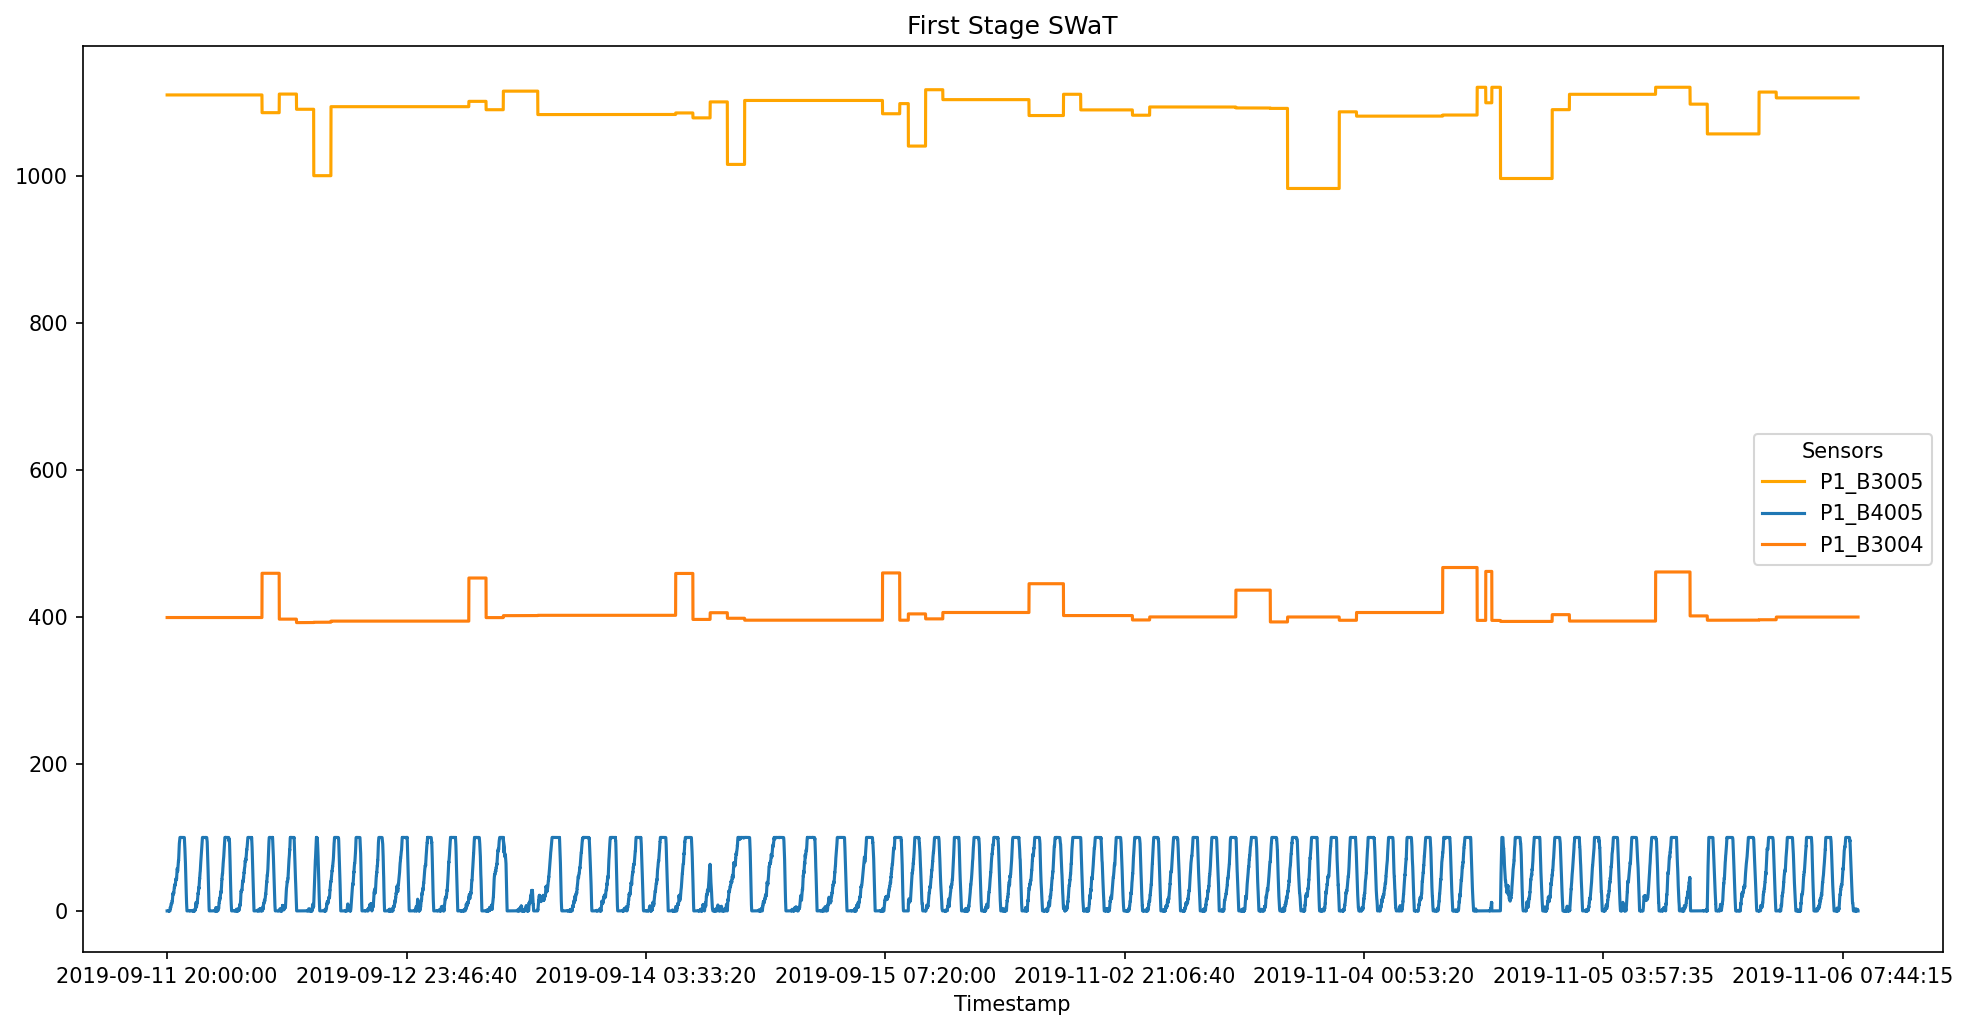

In [236]:
# Visualizing The first stage with respect to time series  
def plot (): 
    plt.figure(figsize=(16, 8), dpi=150) 
    df1['P1_B3005'].plot(label='P1_B3005', color='orange') 
    df1['P1_B4005'].plot(label='P1_B4005')
    df1['P1_B3004'].plot(label='P1_B3004') 
    # adding title to the plot 
    plt.title('First Stage SWaT') 
    # adding Label to the x-axis 
    plt.xlabel('Timestamp') 
    # adding legend to the curve 
    plt.legend(title='Sensors')
    
print (plot ()) 


#### Visualize the dataset 
-  Plotting the number of normal and Attack transactions in the dataset.

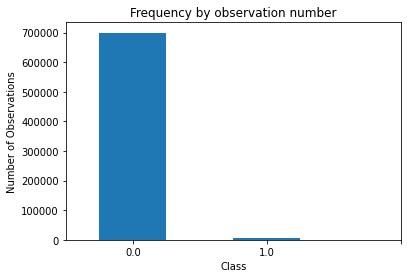

In [237]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(df1['attack'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['attack'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");  

In [238]:
#Count 1 unique values in each columns
df2=df1.nunique().reset_index()
df2.columns = ['feature','number Of unique']
df2[df2['number Of unique']==1] 


,feature,number Of unique
32,P2_Auto,1
33,P2_Emgy,1
34,P2_On,1
37,P2_TripEx,1
45,P3_LH,1
46,P3_LL,1
51,P4_HT_PS,1


In [239]:
# drop the time stamp cols 
#df1= df1.drop('P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS', axis=0) 

# drop two columns name is 'C' and 'D'
df1.drop(['P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS'], axis=1)

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0000,28.9981,35.7395,0.0,0.2838,...,64.4604,57.8704,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0000,29.9914,35.7388,0.0,0.2838,...,64.7208,58.4853,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0000,27.0122,35.7399,0.0,0.2914,...,64.9450,59.2629,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0000,32.9705,35.7452,0.0,0.2762,...,65.1620,59.8235,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0000,30.9843,35.7422,0.0,0.2838,...,65.4369,60.3118,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-06 09:29:55,0.0304,1.2162,399.8923,1106.3584,32.0,0.0113,29.9914,35.4603,0.0,0.2762,...,-0.0072,0.0724,309.9139,-0.0028,308.5214,302.8790,0.0000,10013.0,27622.0,0.0
2019-11-06 09:29:56,0.0304,1.2118,399.8923,1106.3584,32.0,0.0000,35.9501,35.4645,0.0,0.2762,...,-0.0072,0.0724,309.6065,-0.0003,309.5884,303.4758,0.0000,10012.0,27626.0,0.0
2019-11-06 09:29:57,0.0304,1.2170,399.8923,1106.3584,32.0,0.0000,32.9705,35.4534,0.0,0.2762,...,-0.0072,0.0724,309.1905,-0.0004,308.9916,303.8013,0.0000,10012.0,27625.0,0.0


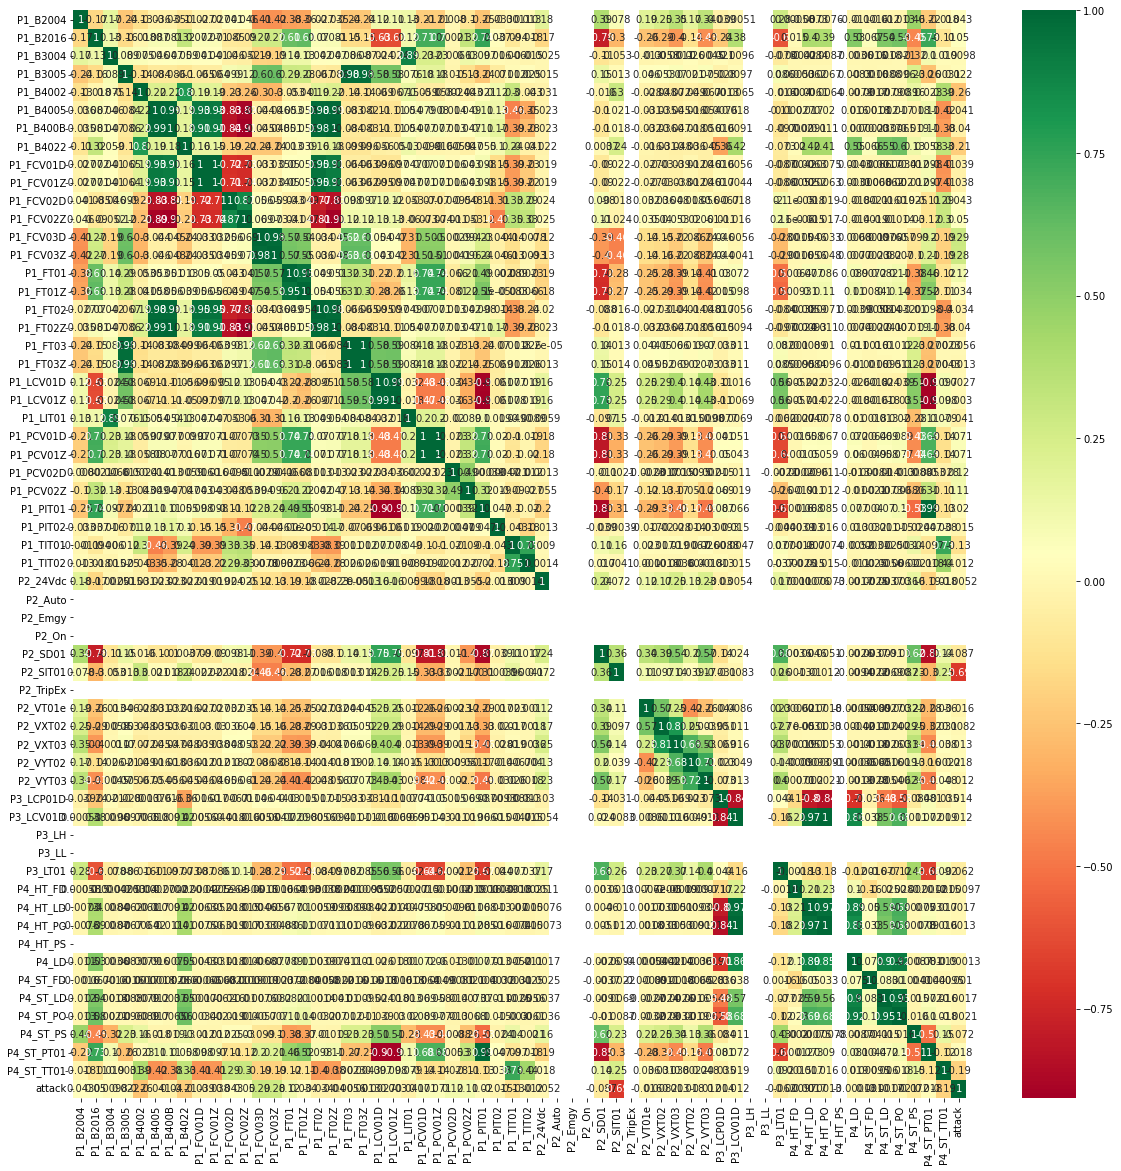

In [240]:
import seaborn as sns


#get correlations of each features in dataset
c = df1.corr()
top_corr_features = c.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")  

In [241]:
c=c.attack.sort_values(ascending=False).head(42).keys().drop('attack') # corelation
print(c)

Index(['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV02Z',
       'P1_PCV01Z', 'P1_PCV01D', 'P1_FCV02Z', 'P1_B2016', 'P1_FCV02D',
       'P1_B2004', 'P1_FT01Z', 'P1_B3005', 'P1_PIT01', 'P4_ST_PT01',
       'P2_VYT02', 'P3_LCP01D', 'P2_VXT03', 'P3_LCV01D', 'P1_B3004',
       'P2_VXT02', 'P1_FT03', 'P1_LCV01Z', 'P1_LCV01D', 'P4_HT_LD', 'P1_FT03Z',
       'P4_HT_PO', 'P4_ST_FD', 'P4_LD', 'P4_HT_FD', 'P4_ST_LD', 'P4_ST_PO',
       'P2_24Vdc', 'P2_VYT03', 'P1_TIT02', 'P1_PIT02', 'P2_VT01e', 'P1_FT02',
       'P1_FCV01Z', 'P1_FCV01D', 'P1_B400B'],
      dtype='object')


In [242]:
# Select Multiple Columns
df2 = df1.loc[:, ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV02Z',
       'P1_PCV01Z', 'P1_PCV01D', 'P1_FCV02Z', 'P1_B2016', 'P1_FCV02D',
       'P1_B2004', 'P1_FT01Z', 'P1_B3005', 'P1_PIT01', 'P4_ST_PT01',
       'P2_VYT02', 'P3_LCP01D', 'P2_VXT03', 'P3_LCV01D', 'P1_B3004',
       'P2_VXT02', 'P1_FT03', 'P1_LCV01Z', 'P1_LCV01D', 'P4_HT_LD', 'P1_FT03Z',
       'P4_HT_PO', 'P4_ST_FD', 'P4_LD', 'P4_HT_FD', 'P4_ST_LD', 'P4_ST_PO',
       'P2_24Vdc', 'P2_VYT03', 'P1_TIT02', 'P1_PIT02', 'P2_VT01e', 'P1_FT02',
       'P1_FCV01Z', 'P1_FCV01D', 'P1_B400B','attack']]



In [243]:
df2.shape

(706345, 42)

In [244]:
#To see how the data is spread betwen Attack and Normal 
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count()) 
print(df2.groupby('attack')['attack'].count()) 

attack
0.0    699579
1.0      6765
Name: attack, dtype: int64


In [245]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706345 entries, 2019-09-11 20:00:00 to 2019-11-06 09:29:59
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   P1_FCV03D   706344 non-null  float64
 1   P1_FCV03Z   706344 non-null  float64
 2   P1_PCV02D   706344 non-null  float64
 3   P1_FT01     706344 non-null  float64
 4   P1_PCV02Z   706344 non-null  float64
 5   P1_PCV01Z   706344 non-null  float64
 6   P1_PCV01D   706344 non-null  float64
 7   P1_FCV02Z   706344 non-null  float64
 8   P1_B2016    706345 non-null  float64
 9   P1_FCV02D   706344 non-null  float64
 10  P1_B2004    706345 non-null  float64
 11  P1_FT01Z    706344 non-null  float64
 12  P1_B3005    706345 non-null  float64
 13  P1_PIT01    706344 non-null  float64
 14  P4_ST_PT01  706344 non-null  float64
 15  P2_VYT02    706344 non-null  float64
 16  P3_LCP01D   706344 non-null  float64
 17  P2_VXT03    706344 non-null  float64
 18  P3_LCV01D   706344

#### Normalize using min Max scaler 

In [246]:
con_feats = ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV02Z',
       'P1_PCV01Z', 'P1_PCV01D', 'P1_FCV02Z', 'P1_B2016', 'P1_FCV02D',
       'P1_B2004', 'P1_FT01Z', 'P1_B3005', 'P1_PIT01', 'P4_ST_PT01',
       'P2_VYT02', 'P3_LCP01D', 'P2_VXT03', 'P3_LCV01D', 'P1_B3004',
       'P2_VXT02', 'P1_FT03', 'P1_LCV01Z', 'P1_LCV01D', 'P4_HT_LD', 'P1_FT03Z',
       'P4_HT_PO', 'P4_ST_FD', 'P4_LD', 'P4_HT_FD', 'P4_ST_LD', 'P4_ST_PO',
       'P2_24Vdc', 'P2_VYT03', 'P1_TIT02', 'P1_PIT02', 'P2_VT01e', 'P1_FT02',
       'P1_FCV01Z', 'P1_FCV01D', 'P1_B400B'] 
scaler = MinMaxScaler() 
df2[con_feats] = scaler.fit_transform(df2[con_feats])
df2.head()  

,P1_FCV03D,P1_FCV03Z,P1_PCV02D,P1_FT01,P1_PCV02Z,P1_PCV01Z,P1_PCV01D,P1_FCV02Z,P1_B2016,P1_FCV02D,...,P2_24Vdc,P2_VYT03,P1_TIT02,P1_PIT02,P2_VT01e,P1_FT02,P1_FCV01Z,P1_FCV01D,P1_B400B,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.189941,0.200449,0.0,0.205704,0.028412,0.356102,0.352100,0.988773,0.482115,1.0,...,0.415541,0.542451,0.378828,0.016001,0.427029,0.001298,0.000378,0.0,0.005514,0.0
2019-09-11 20:00:01,0.187895,0.200449,0.0,0.202007,0.028412,0.356102,0.352091,0.988077,0.481966,1.0,...,0.591216,0.770045,0.378828,0.018362,0.259594,0.001854,0.000378,0.0,0.005858,0.0
2019-09-11 20:00:02,0.186844,0.200449,0.0,0.208080,0.028412,0.356102,0.352089,0.988077,0.482164,1.0,...,0.358108,0.560151,0.378828,0.018013,0.406222,0.001668,0.000454,0.0,0.004825,0.0
2019-09-11 20:00:03,0.182437,0.200449,0.0,0.206760,0.028967,0.356102,0.352043,0.988154,0.482960,1.0,...,0.442568,0.677576,0.381187,0.019674,0.314260,0.001483,0.000303,0.0,0.006892,0.0
2019-09-11 20:00:04,0.186339,0.200449,0.0,0.204119,0.028412,0.356102,0.352065,0.988154,0.482512,1.0,...,0.415541,0.681719,0.376484,0.020024,0.324762,0.001761,0.000378,0.0,0.006203,0.0


#### Split the Data to train and Test 

In [247]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train, x_good_test = train_test_split(df2, test_size=0.2, random_state=42)   

In [248]:
# min max scale the input data or Standard Scaler  
x_good_train = x_good_train[x_good_train.attack == 0] #where normal transactions 
x_good_train = x_good_train.drop(['attack'], axis=1) #drop the class columns 

test_y = x_good_test['attack'] # save the class column for the test set 
x_good_test = x_good_test.drop(['attack'], axis=1) #drop the class column 

#transform to ndarray both train and testing 
x_good_train = x_good_train.values #transform to ndarray 
x_good_test = x_good_test.values 
x_good_train.shape, x_good_test.shape#,x_good_train.shape,test_y.shape  

((559598, 41), (141269, 41))

#### import important libraries 

In [249]:
######### 
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from keras.layers import Input, Dense
from keras import regularizers 
from keras.models import Model, load_model 
import datetime 

In [250]:
model = Sequential()
# encoder 
model.add(Dense(128, input_dim=x_good_train.shape[1], activation='relu')) # Input layers 
Dropout(0.01), 
# hidden layers
model.add(Dense(32, activation='relu'))
Dropout(0.01), 
#model.add(Dense(32, activation='relu'))
#Dropout(0.01), 
#Decoder 
model.add(Dense(128, activation='relu')) ## decoder 
Dropout(0.01), 
model.add(Dense(x_good_train.shape[1])) # output layers 
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')  
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               5376      
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 128)               4224      
                                                                 
 dense_11 (Dense)            (None, 41)                5289      
                                                                 
Total params: 19,017
Trainable params: 19,017
Non-trainable params: 0
_________________________________________________________________


In [251]:
x_good_test.shape[1] 

41

In [252]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(
    x_good_train,x_good_train,
    verbose=2,
    epochs=15,
    batch_size=256,
    validation_data=(x_good_test, x_good_test), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0]) 
print('Accuracy:', score[1])   

Epoch 1/15
2186/2186 - 12s - loss: 0.0115 - accuracy: 0.5959 - val_loss: 0.0094 - val_accuracy: 0.6800 - 12s/epoch - 5ms/step
Epoch 2/15
2186/2186 - 11s - loss: 0.0094 - accuracy: 0.7171 - val_loss: 0.0093 - val_accuracy: 0.7178 - 11s/epoch - 5ms/step
Epoch 3/15
2186/2186 - 11s - loss: 0.0093 - accuracy: 0.7455 - val_loss: 0.0093 - val_accuracy: 0.6501 - 11s/epoch - 5ms/step
Epoch 4/15
2186/2186 - 11s - loss: 0.0093 - accuracy: 0.7398 - val_loss: 0.0093 - val_accuracy: 0.7065 - 11s/epoch - 5ms/step
Epoch 5/15
2186/2186 - 11s - loss: 0.0093 - accuracy: 0.7289 - val_loss: 0.0093 - val_accuracy: 0.7396 - 11s/epoch - 5ms/step
Epoch 6/15
2186/2186 - 11s - loss: 0.0093 - accuracy: 0.7349 - val_loss: 0.0093 - val_accuracy: 0.8057 - 11s/epoch - 5ms/step
Epoch 7/15
2186/2186 - 11s - loss: 0.0093 - accuracy: 0.7487 - val_loss: 0.0093 - val_accuracy: 0.7009 - 11s/epoch - 5ms/step
Epoch 8/15
2186/2186 - 11s - loss: 0.0093 - accuracy: 0.7538 - val_loss: 0.0093 - val_accuracy: 0.8132 - 11s/epoch - 5

#### Plot training and test loss

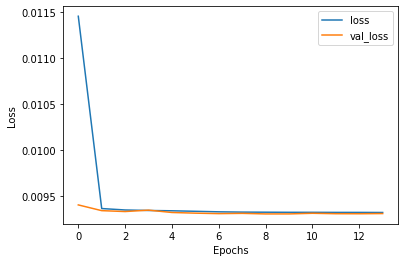

In [253]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['val_loss'])
#plt.plot(grid.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'])#,'accuracy'])
plt.show()  

### Detect Anomalies on test data  
- Anomalies are data points where the reconstruction loss is higher 
- To calculate the reconstruction loss on test data, predict the test data and calculate the mean square error between the test data and the reconstructed test data. 

#### 1. Predictions and Computing Reconstruction Error using RMSE 

In [254]:
# to identify the reconstruction error between the Decoder and encoder 
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'attack': test_y}, index=test_y.index)  
error_df.head()

,Reconstruction_error,attack
time,,
2019-09-14 07:37:04,0.057728,0.0
2019-09-12 08:22:09,0.039053,0.0
2019-11-03 04:07:30,0.048167,0.0
2019-09-12 10:39:21,0.031250,0.0
2019-09-13 03:16:19,0.035492,0.0


In [255]:
# find the maximum of each column using reconstruction error 
maxValues = error_df.max()
 
print(maxValues) 

Reconstruction_error    0.162705
attack                  1.000000
dtype: float64


In [257]:
# finding the number of anomalies using highest reconstruction Error 

outliers = error_df.index[error_df.Reconstruction_error > 0.16].tolist()  
number_of_outliers = len(outliers) 
print("Number of elements in the anomalies: ", number_of_outliers)    

Number of elements in the anomalies:  2


#### Plot Reconsrruction using Error Histogram 
- to determine the exact point using kernel density estimation method 

In [258]:
# To identify the maximum and minimum data point for identifying bins 
import tensorflow as tf 
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mse(test_x_predictions, x_good_test)


trainloss=pd.DataFrame(train_loss)
#trainloss.describe()
#trainloss.to_csv(r'/home/jovyan/trainloss.csv',index=False) 
trainloss.describe()   

,0
count,141269.000000
mean,0.063393
std,0.020144
min,0.018570
25%,0.046232
50%,0.061699
75%,0.078733
max,0.162705


Text(0.5, 1.0, 'bins - loss distribution = 360')

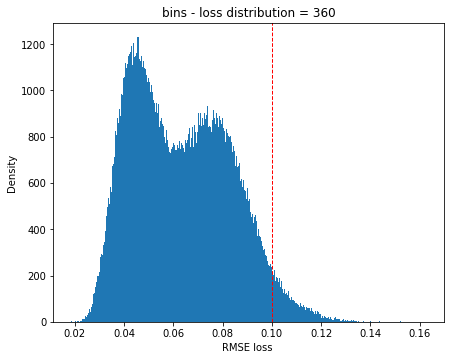

In [272]:
# rules-of-thumb to identify the number of bins Freedman–Diaconis rule 
trainloss=pd.DataFrame(trainloss) 
q1 = trainloss.quantile(0.018570)
q3 = trainloss.quantile(0.162705)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(trainloss) ** (1 / 3))
bin_count = int(np.ceil((trainloss.max() - trainloss.min()) / bin_width))
fig = plt.figure(figsize=(7,5.5))
plt.hist(train_loss, bins = bin_count)  
plt.axvline(0.10,0, 3000,color='red', linestyle='dashed', linewidth=1) 
plt.xlabel('RMSE loss ')
plt.ylabel('Density')
plt.title(f'bins - loss distribution = {bin_count}')  

### Model Interpretability
- find the number of anomaly points according to stattical method i.e usinG RMSE loss and bin values  

In [260]:
# change X_tes_scaled to pandas dataframe
data_n = pd.DataFrame(x_good_test, index= test_y.index)#, columns=numerical_cols) 


In [261]:
# ???
def compute_error_per_dim(point):
    
    initial_pt = np.array(data_n.loc[point,:]).reshape(1,9)
    reconstrcuted_pt = model.predict(initial_pt)
    
    return abs(np.array(initial_pt - reconstrcuted_pt)[0]) 

In [264]:
# finding the number of anomalies using reconstruction Error 
outliers = error_df.index[error_df.Reconstruction_error >0.10].tolist()  
number_of_outliers = len(outliers) 
print("Number of elements in the anomalies: ", number_of_outliers)  

Number of elements in the anomalies:  5439


#### Calculate RMSE and MAE stastical method  

In [265]:
# Define a function to calculate MAE and RMSE
errors = test_x_predictions - x_good_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')    

The performance  of autoencoder:

Mean Absolute Error: 0.0810
Mean Square Error:0.0634
Root Mean Square Error: 0.2518



#### Classfication report using Stastical method  

In [268]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score 
threshold_fixed = 0.10
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.attack, pred_y)
plt.figure(figsize=(4, 4))

# print confustion matrix 
print(conf_matrix)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['attack'], error_df['pred']))
print(" Recall: ",recall_score(error_df['attack'], error_df['pred']))
print(" Precision: ",precision_score(error_df['attack'], error_df['pred']))  
print(classification_report(error_df['attack'], error_df['pred']))   

[[134810   5171]
 [  1020    268]]
 Accuracy:  0.9561758064401956
 Recall:  0.2080745341614907
 Precision:  0.049273763559477844
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98    139981
         1.0       0.05      0.21      0.08      1288

    accuracy                           0.96    141269
   macro avg       0.52      0.59      0.53    141269
weighted avg       0.98      0.96      0.97    141269



<Figure size 288x288 with 0 Axes>

#### Visualizing anomaly points  

<Figure size 720x432 with 0 Axes>

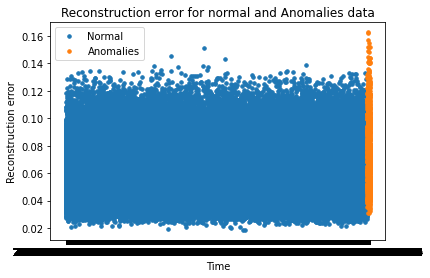

In [269]:
# visualize the anomaly points in the dataset with 2D 
plt.figure(figsize=(10,6))  
threshold_fixed = 0.10
groups = error_df.groupby('attack')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalies" if name == 1 else "Normal")
#ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and Anomalies data")
plt.ylabel("Reconstruction error")
plt.xlabel("Time") 

plt.show();  

#### Mean p-Powered Error for auto encoder 
- To enhance the perfomance of reall and precision  

In [161]:
# to identify the reconstruction error between the Decoder and encoder 
test_x_predictions_mean = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions, 6), axis=1)
error_df_mean = pd.DataFrame({'Reconstruction_error': mse,'attack': test_y}, index=test_y.index)  
error_df_mean.describe() 

,Reconstruction_error,attack
count,141269.000000,141269.000000
mean,0.118786,0.009117
std,0.149767,0.095049
min,0.000001,0.000000
25%,0.000488,0.000000
50%,0.003078,0.000000
75%,0.230368,0.000000
max,0.971043,1.000000


#### Plot Reconsrruction Error Histogram 
- to determine the exact point instead of pick up manually 

In [162]:
# To identify the maximum and minimum data point for identifying bins 
import tensorflow as tf 
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
#train_loss = tf.keras.losses.mse(test_x_predictions_mean, x_good_test)
train_loss=error_df_mean['attack']

trainloss=pd.DataFrame(train_loss)
#trainloss.describe()
#trainloss.to_csv(r'/home/jovyan/trainloss.csv',index=False) 
trainloss.describe()   

,attack
count,141269.000000
mean,0.009117
std,0.095049
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Text(0.5, 1.0, 'bins - loss distribution = 27')

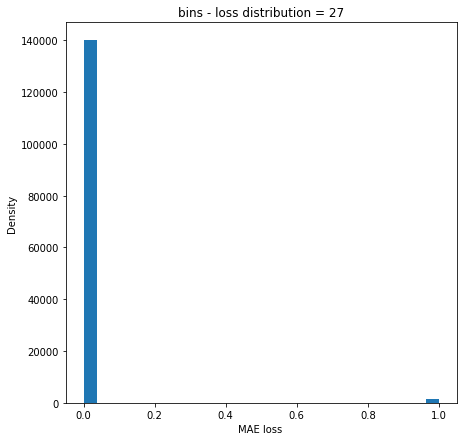

In [166]:
# rules-of-thumb to identify the number of bins Freedman–Diaconis rule 
trainloss=pd.DataFrame(trainloss) 
q1 = trainloss.quantile(0.01)
q3 = trainloss.quantile(1)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(trainloss) ** (1 / 3))
bin_count = int(np.ceil((trainloss.max() - trainloss.min()) / bin_width))
fig = plt.figure(figsize=(7,7))
plt.hist(train_loss, bins = bin_count)  
#sns.histplot(x=trainloss,bins=bin_count)
plt.xlabel('MAE loss ')
plt.ylabel('Density')
plt.title(f'bins - loss distribution = {bin_count}')   

#### Classfication report using Mean p-Powered Error 

In [179]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score 
threshold_fixed = 0.67
pred_y = [1 if e > threshold_fixed else 0 for e in error_df_mean.Reconstruction_error.values]
error_df_mean['pred'] =pred_y
conf_matrix = confusion_matrix(error_df_mean.attack, pred_y)
plt.figure(figsize=(4, 4))

# print confustion matrix 
print(conf_matrix)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df_mean['attack'], error_df_mean['pred']))
#print(" Recall: ",recall_score(error_df_mean['A'], error_df_mean['pred']))
#print(" Precision: ",precision_score(error_df_mean['A'], error_df_mean['pred']))  
print(classification_report(error_df_mean['attack'], error_df_mean['pred']))    

[[139976      5]
 [  1193     95]]
 Accuracy:  0.9915197247803835
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    139981
         1.0       0.95      0.07      0.14      1288

    accuracy                           0.99    141269
   macro avg       0.97      0.54      0.57    141269
weighted avg       0.99      0.99      0.99    141269



<Figure size 288x288 with 0 Axes>

In [273]:
# find the maximum of each column
maxValues_mean = error_df_mean.max()
 
print(maxValues_mean)  

Reconstruction_error    0.971043
attack                  1.000000
pred                    1.000000
dtype: float64


In [274]:
# finding the number of anomalies using reconstruction Error 
outliers_mean = error_df_mean.index[error_df_mean.Reconstruction_error > 0.67].tolist()  
number_of_outliers_mean = len(outliers_mean) 
print("Number of elements in the anomalies: ", number_of_outliers_mean )    

Number of elements in the anomalies:  100


### Dynamic way of identifyig threshold  

#### 1. Logistic regression 

- Define threshold for our model using logistic regression  

In [275]:
# Fit logistic regression model on training set 
from sklearn.linear_model import LogisticRegression  

In [277]:
df_new_HAI = error_df[['Reconstruction_error', 'attack']]
df_new_HAI.head()

,Reconstruction_error,attack
time,,
2019-09-14 07:37:04,0.057728,0.0
2019-09-12 08:22:09,0.039053,0.0
2019-11-03 04:07:30,0.048167,0.0
2019-09-12 10:39:21,0.031250,0.0
2019-09-13 03:16:19,0.035492,0.0


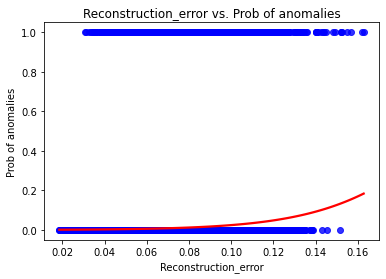

In [279]:
# Plot logistic regression curve
x= df_new_HAI['Reconstruction_error']
y= df_new_HAI['attack']
sns.regplot(x=x, y=y, data=df_new_HAI, logistic=True, ci=None,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

#pl 
plt.xlabel('Reconstruction_error')
plt.ylabel('Prob of anomalies')
plt.title('Reconstruction_error vs. Prob of anomalies')

plt.show()   

In [282]:
# Train/Test split
x_train, x_test, y_train, y_test = train_test_split(df_new_HAI.Reconstruction_error, df_new_HAI.attack, test_size=0.2, random_state=321)  

In [283]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]  

In [284]:
x_train=x = np.array(x_train)
y_train = np.array(y_train) 

In [285]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix 
lrt = LogisticRegressionWithThreshold()
lrt.fit(x_train.reshape(-1, 1), y_train)

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(x_train.reshape(-1, 1), y_train)
y_pred = lrt.predict(x_train.reshape(-1, 1), threshold)

threshold, optimal_tpr_minus_fpr   

(0.011784370749527746, 0.24922091742107955)

In [291]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score 
threshold_fixed = 0.11
pred_y_logs = [1 if e > threshold_fixed else 0 for e in df_new_HAI.Reconstruction_error.values]
df_new_HAI['pred'] =pred_y_logs
conf_matrix = confusion_matrix(df_new_HAI.attack, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(df_new_HAI['attack'], df_new_HAI['pred']))
#print(" Recall: ",recall_score(df_new['A'], df_new['pred']))
#print(" Precision: ",precision_score(df_new['A'], df_new['pred']))  
print(classification_report(df_new_HAI['attack'], df_new_HAI['pred']))     

[[134810   5171]
 [  1020    268]]
 Accuracy:  0.980328309820272
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    139981
         1.0       0.09      0.12      0.10      1288

    accuracy                           0.98    141269
   macro avg       0.54      0.55      0.55    141269
weighted avg       0.98      0.98      0.98    141269



<Figure size 288x288 with 0 Axes>